In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

In [3]:
# get Turkey's energy production dataset from epias
start_date = '2020-01-01'
end_date = '2021-01-01'
production = uretim.gerceklesen(start_date, end_date,)

In [4]:
production.head(4)

Tarih  Saat  Doğalgaz  Barajlı   Linyit   Akarsu  İthal Kömür  Rüzgar  \
0 2020-01-01     0   6166.40  3761.62  5780.09  1545.26      7302.54  770.50   
1 2020-01-01     1   5161.03  3079.97  5792.66  1548.51      7286.46  776.18   
2 2020-01-01     2   5149.52  2160.79  5755.22  1460.39      7281.67  787.75   
3 2020-01-01     3   3860.16  2292.47  5793.94  1591.92      7299.57  815.19   

   Güneş  Fuel Oil  Jeo Termal  Asfaltit Kömür  Taş Kömür  Biyokütle  Nafta  \
0    0.0      35.5     1157.82          293.65     572.31     396.65      0   
1    0.0      35.8     1164.57          273.78     575.65     392.46      0   
2    0.0      36.3     1167.74          273.78     585.67     390.22      0   
3    0.0      36.6     1168.91          271.57     569.56     392.99      0   

   LNG  Uluslararası    Toplam  
0    0         278.0  28060.34  
1    0         394.0  26481.07  
2    0         172.0  25221.05  
3    0         154.0  24246.88

In [5]:
production.describe()

Saat      Doğalgaz       Barajlı       Linyit       Akarsu  \
count  8808.00000   8808.000000   8808.000000  8808.000000  8808.000000   
mean     11.50000   7746.026504   6515.794933  4303.827785  2331.419566   
std       6.92258   3952.323549   3171.403680   622.512318  1448.579504   
min       0.00000    496.660000    366.190000  2189.100000   419.440000   
25%       5.75000   3980.625000   3902.125000  3921.495000  1090.195000   
50%      11.50000   8929.805000   6796.245000  4305.005000  1809.795000   
75%      17.25000  11058.337500   9052.125000  4732.692500  3552.550000   
max      23.00000  14615.630000  15891.780000  6149.070000  5744.500000   

       İthal Kömür       Rüzgar        Güneş     Fuel Oil   Jeo Termal  \
count  8808.000000  8808.000000  8808.000000  8808.000000  8808.000000   
mean   7111.608642  2788.028970    47.980268    35.631681  1061.087693   
std    1716.678584  1608.350955    66.317553     3.309019   105.220071   
min     992.650000   139.760000     0.000000     0.000000   663.530000   
25%    6708.195000  1370.720000     0.000000    34.200000   993.385000   
50%    7656.220000  2588.285000     2.670000    36.400000  1089.000000   
75%    8340.122500  4092.695000    93.282500    37.800000  1141.867500   
max    8790.980000  6861.040000   297.990000    43.600000  1255.580000   

       Asfaltit Kömür    Taş Kömür    Biyokütle   Nafta     LNG  Uluslararası  \
count     8808.000000  8808.000000  8808.000000  8808.0  8808.0   8808.000000   
mean       252.972661   431.470344   463.165296     0.0     0.0    -62.418569   
std         79.484606   158.347459    36.506329     0.0     0.0    315.830842   
min         48.570000   167.240000   369.680000     0.0     0.0  -1949.250000   
25%        211.960000   272.177500   439.615000     0.0     0.0   -313.360000   
50%        242.880000   438.840000   458.440000     0.0     0.0    -85.000000   
75%        333.390000   598.862500   480.445000     0.0     0.0    182.000000   
max        362.100000   692.620000   596.090000     0.0     0.0    789.000000   

             Toplam  
count   8808.000000  
mean   33026.595775  
std     5495.008940  
min    15246.640000  
25%    29067.472500  
50%    32908.105000  
75%    37484.857500  
max    45210.030000

It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.

In [6]:
featurecols = ['Doğalgaz', 'Barajlı', 'Linyit', 'Akarsu',
               'İthal Kömür', 'Rüzgar', 'Güneş', 'Jeo Termal',
               'Taş Kömür', 'Biyokütle']

X = production[featurecols]

we are going to calculate if the average total production will be exceeded with given Natural gas variable. 
If exceeded the probability is 1, if not exceeded it is 0. Let's arrange the data as such.

In [10]:
y = production[['Toplam']]
y_mean = y.mean()

y = y.where(y < y_mean, 1)
y = y.where(y == 1, 0)

In [15]:
y['Toplam'].value_counts()

0.0    4455
1.0    4353
Name: Toplam, dtype: int64

In [17]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [78]:
# Build decision tree model
clf = DecisionTreeClassifier()

# train
clf = clf.fit(X_train, y_train)

In [79]:
# predict the test x
y_pred = clf.predict(X_test)

In [80]:
# model accuracy
metrics.accuracy_score(y_test, y_pred)

0.9458948164964056

In [81]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[1268,   65],
       [  78, 1232]])

In [82]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      1333
         1.0       0.95      0.94      0.95      1310

    accuracy                           0.95      2643
   macro avg       0.95      0.95      0.95      2643
weighted avg       0.95      0.95      0.95      2643



In [83]:
roc_auc_score = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

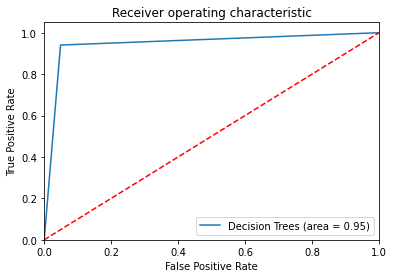

In [84]:
plt.figure()
plt.plot(fpr, tpr, label='Decision Trees (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

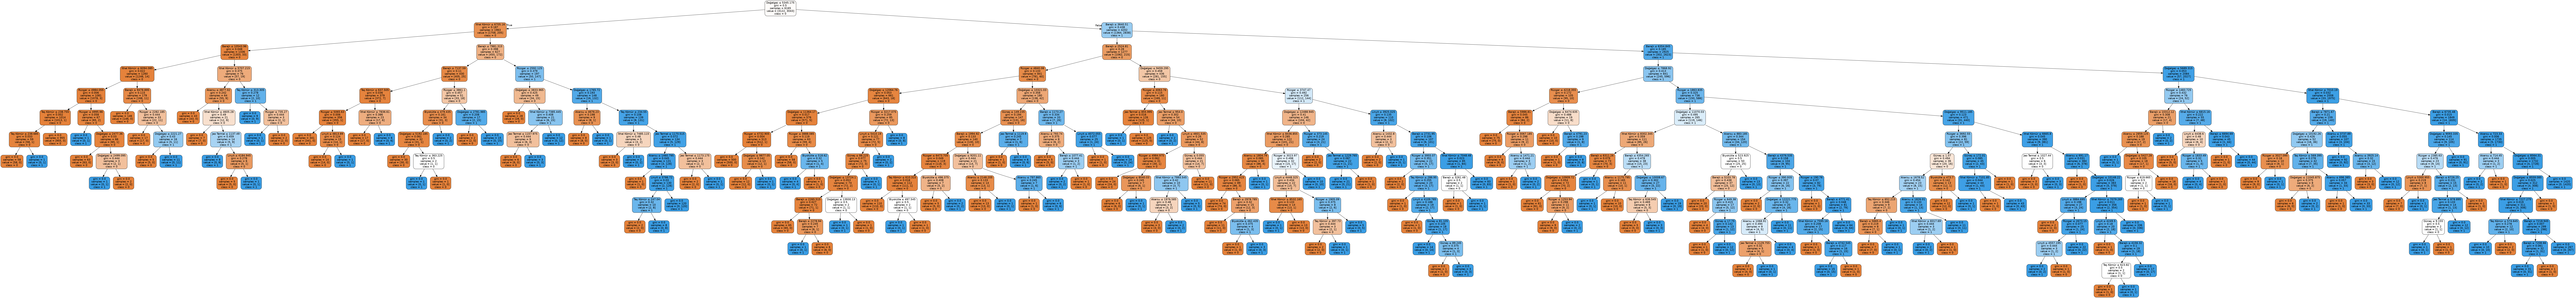

In [45]:
# visualize decision trees
# install graphviz and pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled = True, rounded = True,
                special_characters=True, feature_names=featurecols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

This decisin trees is unpruned

In [54]:
# optimize decision trees
clf_opt = DecisionTreeClassifier(criterion='entropy', max_depth = 4)

# train
clf_opt = clf_opt.fit(X_train, y_train)

# predict
y_pred_opt = clf_opt.predict(X_test)

In [85]:
metrics.confusion_matrix(y_test, y_pred_opt)

array([[1152,  181],
       [  74, 1236]])

In [55]:
metrics.accuracy_score(y_test, y_pred_opt)

0.9035187287173666

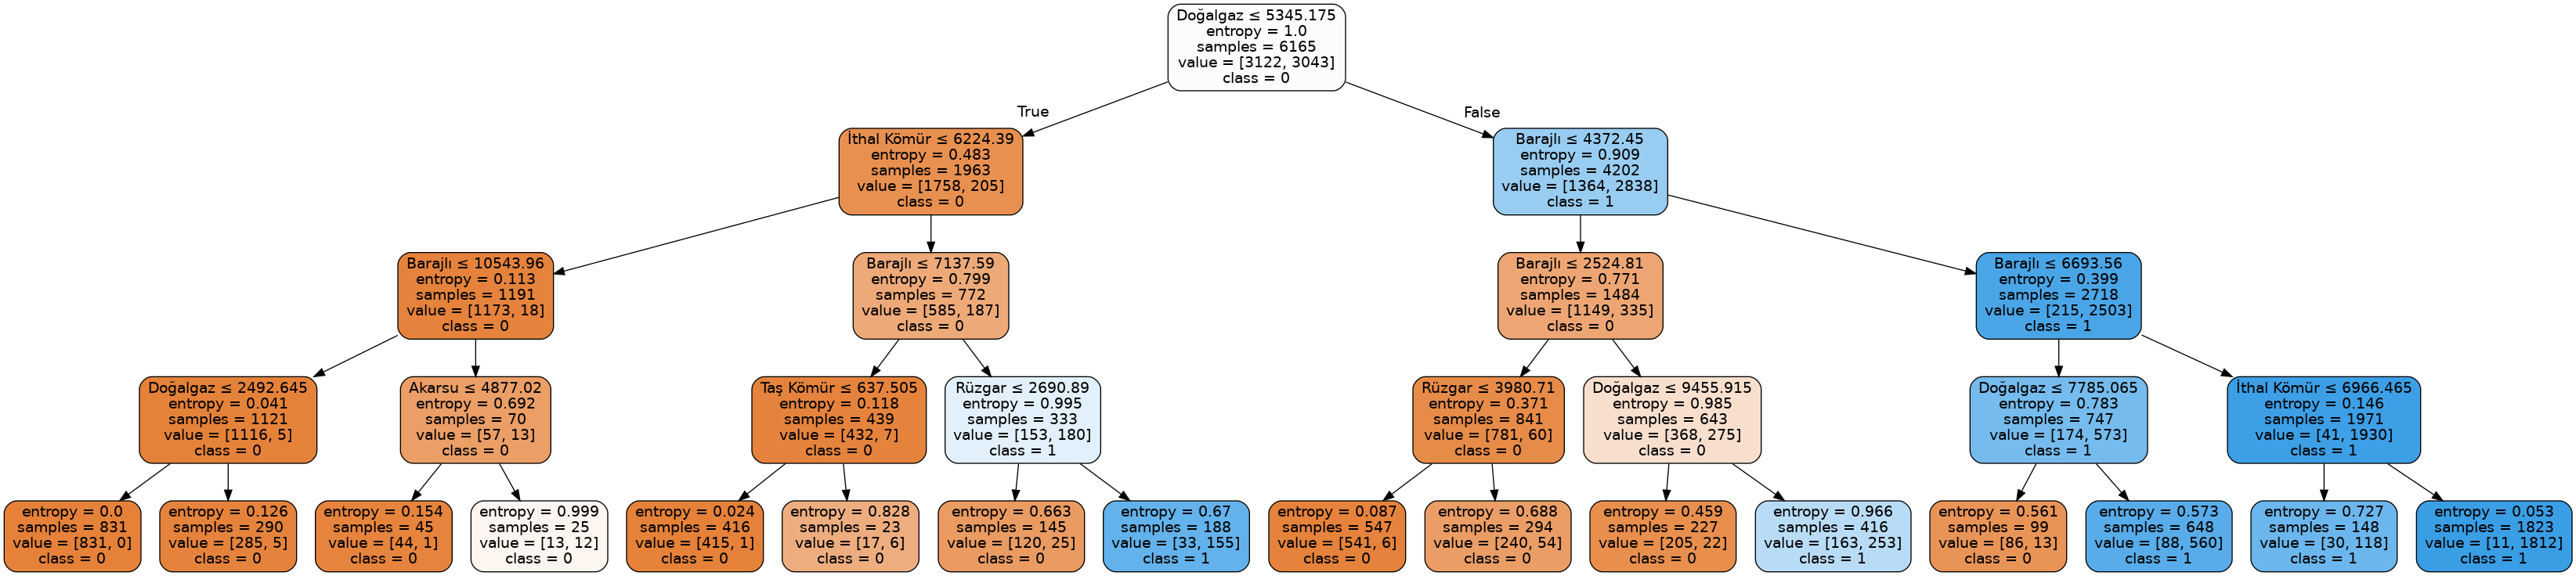

In [56]:
# visualize decision trees
# install graphviz and pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf_opt, out_file = dot_data,
                filled = True, rounded = True,
                special_characters=True, feature_names=featurecols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [72]:
roc_auc_score = metrics.roc_auc_score(y_test, y_pred_opt)
fpr, tpr, thresholds = roc_curve = metrics.roc_curve(y_test, clf_opt.predict_proba(X_test)[:, 1])

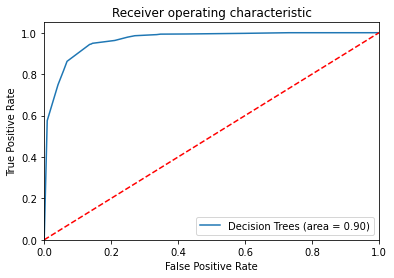

In [73]:
plt.figure()
plt.plot(fpr, tpr, label='Decision Trees (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()